# Tugas Besar 2 IF3170 - Intelegensi Buatan
## Kelompok Butuh Passingan
### Nama Anggota :
1. Andreas Halim - 13516003
2. Aldo Azali - 13516125
3. Untung Tanujaya - 13516135
4. Dafi Faraz - 13516XXX
5. Jeffry - 13516156

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df = pd.read_csv('tubes2_HeartDisease_train.csv', na_values='?')
dg = pd.read_csv('tubes2_HeartDisease_test.csv', na_values='?')
df.shape

(779, 14)

In [80]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


In [81]:
df.columns = ['Age', 'Sex', 'Chest-Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholestrol', 'Fasting_Blood_Sugar_120',
       'resting_ECG', 'Max-Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'Peak_Exercise', 'Number_Major_Vessels',
       'Thal', 'Diagnosis_HD']
dg.columns = ['Age', 'Sex', 'Chest-Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholestrol', 'Fasting_Blood_Sugar_120',
       'resting_ECG', 'Max-Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'Peak_Exercise', 'Number_Major_Vessels',
       'Thal']

In [82]:
df.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal,Diagnosis_HD
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


## Data Preprocessing

### Add some description to data

In [83]:
df['Sex'] = df['Sex'].replace(1, 'Male')
df['Sex'] = df['Sex'].replace(0, 'Female')
df['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(1, 'Typical_Angina')
df['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(2, 'Atypical_Angina')
df['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(3, 'Non-Anginal_Pain')
df['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(4, 'Asymptotic')
df['Fasting_Blood_Sugar_120'] = df['Fasting_Blood_Sugar_120'].replace(1, True)
df['Fasting_Blood_Sugar_120'] = df['Fasting_Blood_Sugar_120'].replace(0, False)
df['resting_ECG'] = df['resting_ECG'].replace(0, 'normal')
df['resting_ECG'] = df['resting_ECG'].replace(1, 'having_ST-T_wave_abnormality')
df['resting_ECG'] = df['resting_ECG'].replace(2, 'left_ventricular_hyperthrophy')
df['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].replace(1, 'YES')
df['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].replace(0, 'NO')
df['Peak_Exercise'] = df['Peak_Exercise'].replace(1, 'upsloping')
df['Peak_Exercise'] = df['Peak_Exercise'].replace(2, 'flat')
df['Peak_Exercise'] = df['Peak_Exercise'].replace(3, 'downsloping')
df['Thal'] = df['Thal'].replace(3, 'normal')
df['Thal'] = df['Thal'].replace(6, 'fixed_defect')
df['Thal'] = df['Thal'].replace(7, 'reversable_defect')
df.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal,Diagnosis_HD
0,54,Male,Asymptotic,125.0,216.0,False,normal,140.0,NO,0.0,NaN,NaN,NaN,1
1,55,Male,Asymptotic,158.0,217.0,False,normal,110.0,YES,2.5,flat,NaN,NaN,1
2,54,Female,Non-Anginal_Pain,135.0,304.0,True,normal,170.0,NO,0.0,upsloping,0.0,normal,0
3,48,Female,Non-Anginal_Pain,120.0,195.0,False,normal,125.0,NO,0.0,NaN,NaN,NaN,0
4,50,Male,Asymptotic,120.0,0.0,False,having_ST-T_wave_abnormality,156.0,YES,0.0,upsloping,NaN,fixed_defect,3


In [84]:
dg['Sex'] = df['Sex'].replace(1, 'Male')
dg['Sex'] = df['Sex'].replace(0, 'Female')
dg['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(1, 'Typical_Angina')
dg['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(2, 'Atypical_Angina')
dg['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(3, 'Non-Anginal_Pain')
dg['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(4, 'Asymptotic')
dg['Fasting_Blood_Sugar_120'] = df['Fasting_Blood_Sugar_120'].replace(1, True)
dg['Fasting_Blood_Sugar_120'] = df['Fasting_Blood_Sugar_120'].replace(0, False)
dg['resting_ECG'] = df['resting_ECG'].replace(0, 'normal')
dg['resting_ECG'] = df['resting_ECG'].replace(1, 'having_ST-T_wave_abnormality')
dg['resting_ECG'] = df['resting_ECG'].replace(2, 'left_ventricular_hyperthrophy')
dg['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].replace(1, 'YES')
dg['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].replace(0, 'NO')
dg['Peak_Exercise'] = df['Peak_Exercise'].replace(1, 'upsloping')
dg['Peak_Exercise'] = df['Peak_Exercise'].replace(2, 'flat')
dg['Peak_Exercise'] = df['Peak_Exercise'].replace(3, 'downsloping')
dg['Thal'] = df['Thal'].replace(3, 'normal')
dg['Thal'] = df['Thal'].replace(6, 'fixed_defect')
dg['Thal'] = df['Thal'].replace(7, 'reversable_defect')
dg.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal
0,60,Male,Asymptotic,160.0,267.0,False,normal,157.0,NO,0.5,NaN,NaN,NaN
1,61,Male,Asymptotic,148.0,203.0,False,normal,161.0,YES,0.0,flat,1.0,NaN
2,54,Female,Non-Anginal_Pain,130.0,242.0,True,normal,91.0,NO,1.0,upsloping,NaN,normal
3,48,Female,Non-Anginal_Pain,120.0,260.0,False,normal,115.0,NO,2.0,NaN,NaN,NaN
4,57,Male,Asymptotic,130.0,308.0,False,having_ST-T_wave_abnormality,98.0,YES,1.0,upsloping,NaN,fixed_defect


## Data Analysis with graphic

Class 0: 349
Class 1: 225
Class 2: 92
Class 3: 90
Class 4: 23
Proportion: 1.55 : 1


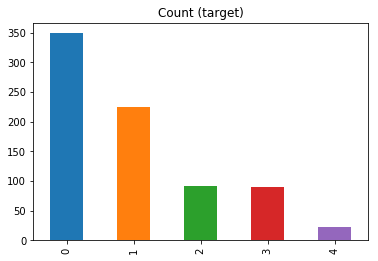

In [164]:
target_count = df.Diagnosis_HD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Class 3:', target_count[3])
print('Class 4:', target_count[4])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

c:\users\aldo azali\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


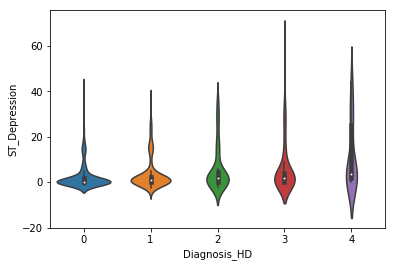

In [86]:
# "Age", Resting_Blood_Pressure , Serum_Cholestrol , "Max-Heart_Rate_Achieved" , ST_Depression
sns.violinplot(x=df['Diagnosis_HD'], y=df['ST_Depression'])

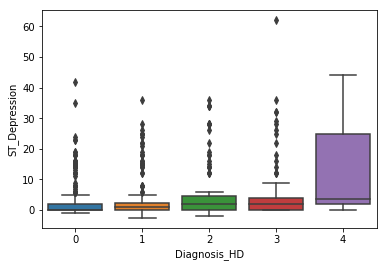

In [87]:
# "Age", Resting_Blood_Pressure , Serum_Cholestrol , "Max-Heart_Rate_Achieved" , ST_Depression
sns.boxplot(x=df['Diagnosis_HD'], y=df['ST_Depression'])

In [88]:
df['ST_Depression'].unique()

array([ 0. ,  2.5,  2. ,  4. ,  0.5,  8. ,  1.5, 12. ,  nan,  6. ,  1. ,
        3. ,  2.6, 14. ,  2.2, 25. , 32. , 36. ,  1.1, 28. , -0.5, 18. ,
        0.7, 29. ,  1.8, 34. ,  1.4, 15. , 16. ,  0.1, 26. , 42. ,  5. ,
        0.3,  1.3,  0.8,  1.6,  9. , 11. , 22. , -0.7, 21. , -1.5,  0.4,
       38. , 24. , -0.8, 19. ,  3.5,  2.1, 23. , -1.1, 13. , -2.6,  0.2,
       -0.1, -0.9, 44. ,  2.4,  0.9, -2. , 62. ,  7. , 35. ,  1.7,  2.8,
       -1. ])

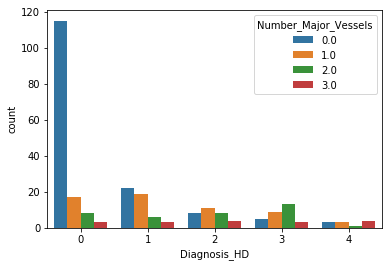

In [89]:
# "Chest-Pain_Type" , -resting_ECG- ,"Peak_Exercise" , "Thal"  , "Number_Major_Vessels", Fasting_Blood_Sugar_120, "Exercise_Induced_Angina"
sns.countplot(x=df['Diagnosis_HD'], hue=df['Number_Major_Vessels'])

### Check Null Values
If there is null values, then change it to :
1. Median
2. dummy value (ex : 'Empty' OR '?')
3. mode

In [90]:
df.isnull().sum()

Age                          0
Sex                          0
Chest-Pain_Type              0
Resting_Blood_Pressure      47
Serum_Cholestrol            24
Fasting_Blood_Sugar_120     78
resting_ECG                  2
Max-Heart_Rate_Achieved     44
Exercise_Induced_Angina     44
ST_Depression               49
Peak_Exercise              262
Number_Major_Vessels       514
Thal                       408
Diagnosis_HD                 0
dtype: int64

In [91]:
# RBP, SC, MHRA, STD,  = median
# FBS, ecg, EIA, pe, NMV, thal = mode
# fbs, ECG , eia, PE,nmv, THAL = 'Empty'
rbp_med = df['Resting_Blood_Pressure'].median()
sc_med = df['Serum_Cholestrol'].median()
mhra_med = df['Max-Heart_Rate_Achieved'].median()
std_med = df['ST_Depression'].median()

In [92]:
# Fill with median
df['Resting_Blood_Pressure'] = df['Resting_Blood_Pressure'].fillna(rbp_med)
df['Serum_Cholestrol'] = df['Serum_Cholestrol'].fillna(sc_med)
df['Max-Heart_Rate_Achieved'] = df['Max-Heart_Rate_Achieved'].fillna(mhra_med)
df['ST_Depression'] = df['ST_Depression'].fillna(std_med)
# Others Fill with '?'
df = df.fillna('?')

In [93]:
rbp_medg = dg['Resting_Blood_Pressure'].median()
sc_medg = dg['Serum_Cholestrol'].median()
mhra_medg = dg['Max-Heart_Rate_Achieved'].median()
std_medg = dg['ST_Depression'].median()

In [94]:
# Fill with median
dg['Resting_Blood_Pressure'] = dg['Resting_Blood_Pressure'].fillna(rbp_medg)
dg['Serum_Cholestrol'] = dg['Serum_Cholestrol'].fillna(sc_medg)
dg['Max-Heart_Rate_Achieved'] = dg['Max-Heart_Rate_Achieved'].fillna(mhra_medg)
dg['ST_Depression'] = dg['ST_Depression'].fillna(std_medg)
# Others Fill with '?'
dg = dg.fillna('?')

In [95]:
dg.isnull().sum()

Age                        0
Sex                        0
Chest-Pain_Type            0
Resting_Blood_Pressure     0
Serum_Cholestrol           0
Fasting_Blood_Sugar_120    0
resting_ECG                0
Max-Heart_Rate_Achieved    0
Exercise_Induced_Angina    0
ST_Depression              0
Peak_Exercise              0
Number_Major_Vessels       0
Thal                       0
dtype: int64

### Create Data Split Train and Data Split Test(90:10)

In [295]:
from scipy.stats import ttest_ind

In [318]:
y_train = df['Diagnosis_HD']  # yang ingin diprediksi
X_train = df.drop(['Diagnosis_HD'], axis = 1)

In [319]:
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12)
X_train_split.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal
715,54,Male,Non-Anginal_Pain,150.0,225.0,False,normal,122.0,NO,0.0,?,?,?
3,48,Female,Non-Anginal_Pain,120.0,195.0,False,normal,125.0,NO,0.0,?,?,?
334,68,Male,Asymptotic,135.0,0.0,False,having_ST-T_wave_abnormality,120.0,YES,0.0,upsloping,?,reversable_defect
515,57,Female,Asymptotic,120.0,354.0,False,normal,163.0,YES,6.0,upsloping,0,normal
617,59,Male,Asymptotic,140.0,177.0,False,normal,162.0,YES,0.0,upsloping,1,reversable_defect


In [320]:
df_train = pd.concat([X_train_split,y_train_split], axis=1)
df_train.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal,Diagnosis_HD
715,54,Male,Non-Anginal_Pain,150.0,225.0,False,normal,122.0,NO,0.0,?,?,?,0
3,48,Female,Non-Anginal_Pain,120.0,195.0,False,normal,125.0,NO,0.0,?,?,?,0
334,68,Male,Asymptotic,135.0,0.0,False,having_ST-T_wave_abnormality,120.0,YES,0.0,upsloping,?,reversable_defect,3
515,57,Female,Asymptotic,120.0,354.0,False,normal,163.0,YES,6.0,upsloping,0,normal,0
617,59,Male,Asymptotic,140.0,177.0,False,normal,162.0,YES,0.0,upsloping,1,reversable_defect,2


Class 0: 286
Class 1: 174
Class 2: 75
Class 3: 68
Class 4: 20


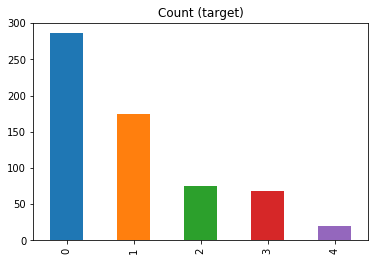

In [321]:
target_count = y_train_split.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Class 3:', target_count[3])
print('Class 4:', target_count[4])
# print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

In [343]:
# Class count
count_class_0, count_class_1,count_class_2, count_class_3, count_class_4 = df.Diagnosis_HD.value_counts()

# Divide by class
df_class_0 = df[df['Diagnosis_HD'] == 0]
df_class_1 = df[df['Diagnosis_HD'] == 1]
df_class_2 = df[df['Diagnosis_HD'] == 2]
df_class_3 = df[df['Diagnosis_HD'] == 3]
df_class_4 = df[df['Diagnosis_HD'] == 4]

Random over-sampling:
4    349
3    349
2    349
1    349
0    349
Name: Diagnosis_HD, dtype: int64


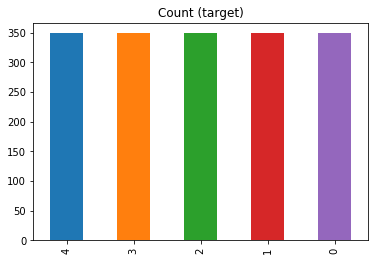

In [344]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_2_over = df_class_2.sample(count_class_0, replace=True)
df_class_3_over = df_class_3.sample(count_class_0, replace=True)
df_class_4_over = df_class_4.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over, df_class_2_over, df_class_3_over, df_class_4_over], axis=0)

print('Random over-sampling:')
print(df_over.Diagnosis_HD.value_counts())

df_over.Diagnosis_HD.value_counts().plot(kind='bar', title='Count (target)');

In [345]:
X_train_split = df_over.drop(['Diagnosis_HD'], axis = 1)
y_train_split = df_over['Diagnosis_HD']

In [346]:
X_train_split.shape

(1745, 13)

### Create Data Full Train and Data Test

In [347]:
#TBD

## Data Processing

### Feature Engineering

In [348]:
# # Change y_train_split = [0,1,2,3,4] to y_train_split1 = [true, false]
# y_train_split1 = y_train_split
# y_train_split1 = y_train_split1.replace[0,False]

### Make Dummies

In [349]:
X_train_split = pd.get_dummies(X_train_split)
X_test_split = pd.get_dummies(X_test_split)

In [350]:
X_train_split.head()

,Age,Resting_Blood_Pressure,Serum_Cholestrol,Max-Heart_Rate_Achieved,ST_Depression,Sex_Female,Sex_Male,Chest-Pain_Type_Asymptotic,Chest-Pain_Type_Atypical_Angina,Chest-Pain_Type_Non-Anginal_Pain,...,Peak_Exercise_upsloping,Number_Major_Vessels_0.0,Number_Major_Vessels_1.0,Number_Major_Vessels_2.0,Number_Major_Vessels_3.0,Number_Major_Vessels_?,Thal_?,Thal_fixed_defect,Thal_normal,Thal_reversable_defect
2,54,135.0,304.0,170.0,0.0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,48,120.0,195.0,125.0,0.0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
5,64,130.0,303.0,122.0,2.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
7,58,130.0,251.0,110.0,0.0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
8,42,150.0,268.0,136.0,0.0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [351]:
null_in_test = list(set(X_train_split.columns) - set(X_test_split.columns))
null_in_train = list(set(X_test_split.columns) - set(X_train_split.columns))
print(null_in_test)
print(null_in_train)

[]
[]


In [352]:
for col in null_in_test:
    X_test_split[col] = 0

In [353]:
null_in_test = list(set(X_train_split.columns) - set(X_test_split.columns))
null_in_train = list(set(X_test_split.columns) - set(X_train_split.columns))
print(null_in_test)
print(null_in_train)

[]
[]


### Modeling with ML

In [354]:
from sklearn.metrics import accuracy_score

#### KNN (K Nearest Neighbors)

In [355]:
from sklearn.neighbors import KNeighborsClassifier

In [356]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_split, y_train_split)
    predict_knn_i = knn.predict(X_test_split)
    error_rate.append(np.mean(predict_knn_i != y_test_split))

Text(0, 0.5, 'Error Rate')

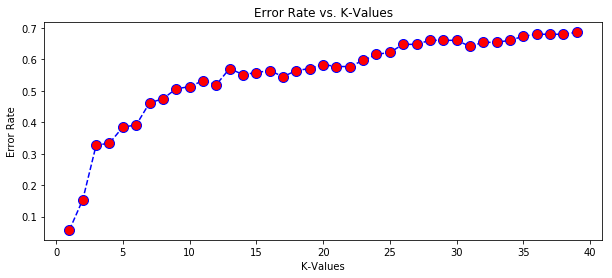

In [357]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [358]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_split, y_train_split)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [359]:
predict_knn = knn.predict(X_test_split)
print('Nilai akurasi knn  : ', accuracy_score(y_test_split, predict_knn))

Nilai akurasi knn  :  0.8461538461538461


In [360]:
predict_knn[0:20]

array([0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 1, 2, 3, 1, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [361]:
y_test_split.head(20)

167    0
10     1
320    0
351    0
506    2
250    1
497    1
380    2
666    2
610    0
151    1
604    2
483    3
416    1
761    1
423    1
710    0
504    2
317    0
193    0
Name: Diagnosis_HD, dtype: int64

In [362]:
knn.score(X_train_split ,y_train_split)

0.9742120343839542

In [363]:
knn.score(X_test_split, y_test_split)

0.8461538461538461

In [364]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix

In [365]:
print(classification_report(y_test_split, predict_knn))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        63
           1       0.94      0.63      0.75        51
           2       0.88      0.82      0.85        17
           3       1.00      0.91      0.95        22
           4       1.00      1.00      1.00         3

   micro avg       0.85      0.85      0.85       156
   macro avg       0.92      0.87      0.88       156
weighted avg       0.87      0.85      0.84       156



In [366]:
# Print out confusion matrix
cmat = confusion_matrix(y_test_split, predict_knn)
print(cmat)
print('TP - True Positive {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TN - True Negative {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

[[63  0  0  0  0]
 [18 32  1  0  0]
 [ 2  1 14  0  0]
 [ 0  1  1 20  0]
 [ 0  0  0  0  3]]
TP - True Positive 63
FP - False Positive 0
FN - False Negative 18
TN - True Negative 32
Accuracy Rate: 0.6089743589743589
Misclassification Rate: 0.11538461538461539


In [367]:
val_accuracy = []
for i in np.arange(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_split,y_train_split)
    y_predict_split = knn.predict(X_test_split)
    performance = np.mean(y_predict_split == y_test_split)
    val_accuracy.append(performance)

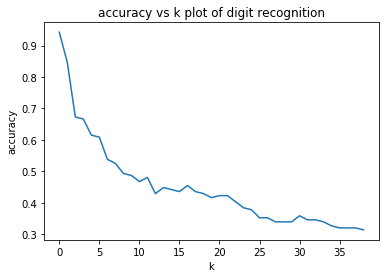

In [368]:
plt.title('accuracy vs k plot of digit recognition')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(val_accuracy)

### Model yang lain

In [ ]:
#TBD
X_test_split.shape

In [ ]:
X_test_split.head()

### Referensi

https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6